**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
solar_data=pd.read_csv('/content/sonar data.csv',header=None)
solar_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
solar_data.shape

(208, 61)

In [ ]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
solar_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [8]:
solar_data[60].value_counts()

,count
60,
M,111
R,97


In [9]:
solar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


**Train Test Split**

In [10]:
x=solar_data.drop(columns=60,axis=1)
y=solar_data[60]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

**Using Standard scaler**

In [49]:
#Here is no use for standard scaler why because Is already is range from 0 to 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)
print(x_train_std) #here data is convert into range from 0 to 1
print(x_train) #Here data is random value

[[ 0.60535609  0.20762246  0.05044716 ... -0.07902386  2.67181591
   2.65755511]
 [-0.74123519 -1.18573012 -0.6803672  ... -0.36465131 -0.51829817
   0.12457456]
 [-0.6070388  -0.91648324 -0.92203092 ... -1.07120341 -0.72669758
  -0.63332513]
 ...
 [-0.76899995 -1.02754758 -0.43870349 ... -0.30451921 -0.85494337
  -0.25437528]
 [ 4.0111677   2.65440342  1.27041218 ...  0.88308964 -0.18165296
   0.42374549]
 [-0.44507765 -0.09528028 -0.76189231 ...  0.49223103  1.82218754
   1.83982123]]
[[ 0.60535609  0.20762246  0.05044716 ... -0.07902386  2.67181591
   2.65755511]
 [-0.74123519 -1.18573012 -0.6803672  ... -0.36465131 -0.51829817
   0.12457456]
 [-0.6070388  -0.91648324 -0.92203092 ... -1.07120341 -0.72669758
  -0.63332513]
 ...
 [-0.76899995 -1.02754758 -0.43870349 ... -0.30451921 -0.85494337
  -0.25437528]
 [ 4.0111677   2.65440342  1.27041218 ...  0.88308964 -0.18165296
   0.42374549]
 [-0.44507765 -0.09528028 -0.76189231 ...  0.49223103  1.82218754
   1.83982123]]


**Using Label Encoder**

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(y_train)
y_train_le=encoder.transform(y_train)
y_test_le=encoder.transform(y_test)
print(y_train_le) #here Label is convert into 0 and 1s
print(y_train)  # Here Label is R and M

[0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0
 0 0]
115    M
38     R
56     R
123    M
18     R
      ..
140    M
5      R
154    M
131    M
203    M
Name: 60, Length: 187, dtype: object


**Building the Neural Network**

In [51]:
#Importing Libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

**Building the Layers**

In [52]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(60,)),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling the nerual network**

In [53]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training The Neural Network**

In [54]:
history=model.fit(x_train_std,y_train_le,validation_split=0.1,epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5446 - loss: 0.7719 - val_accuracy: 0.5789 - val_loss: 0.7286
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6286 - loss: 0.6740 - val_accuracy: 0.5789 - val_loss: 0.6827
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6685 - loss: 0.6129 - val_accuracy: 0.6316 - val_loss: 0.6509
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6696 - loss: 0.5656 - val_accuracy: 0.6316 - val_loss: 0.6270
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7077 - loss: 0.5272 - val_accuracy: 0.6316 - val_loss: 0.6083
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7460 - loss: 0.4945 - val_accuracy: 0.6842 - val_loss: 0.5906
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7623 - loss: 0.4654 - val_accuracy: 0.6842 - val_loss: 0.5724
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7697 - loss: 0.4389 - val_accuracy: 0.6842 - val_loss: 0.5561
Epoch 9

**Visualize the Accuracy and Loss**

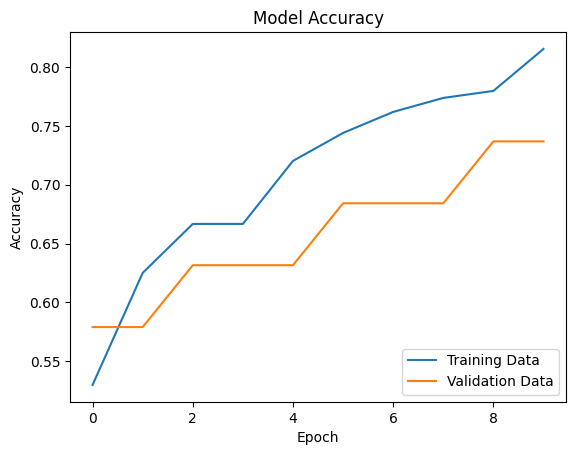

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data','Validation Data'],loc='lower right')
plt.show()

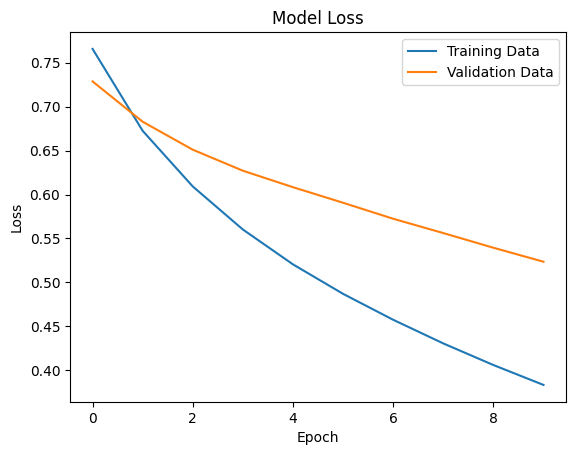

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data','Validation Data'],loc='upper right')
plt.show()

**Accuracy Of Model**

In [58]:
loss,accuracy=model.evaluate(x_test_std,y_test_le)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7619 - loss: 0.5609
Loss: 0.5608940720558167
Accuracy: 0.761904776096344


In [59]:
y_pred=model.predict(x_test_std)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
[[0.35244736 0.32599506]
 [0.55877024 0.91479063]
 [0.68738955 0.75495213]
 [0.5316932  0.47126764]
 [0.70569485 0.39832506]
 [0.68218946 0.31748816]
 [0.6702442  0.4125967 ]
 [0.3714568  0.887617  ]
 [0.41894668 0.901379  ]
 [0.9004868  0.41898644]
 [0.25382352 0.94581544]
 [0.43530917 0.57217103]
 [0.658057   0.7718336 ]
 [0.60867506 0.5736395 ]
 [0.29102296 0.87905955]
 [0.80736107 0.1841974 ]
 [0.7087193  0.4926296 ]
 [0.6515599  0.42689165]
 [0.45193958 0.81233937]
 [0.72504723 0.5242971 ]
 [0.46342865 0.3651348 ]]


**Building the Predictive System**

In [68]:
input_data=(0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,0.3056,0.3161,0.2314,0.2067,0.1804,0.2808,0.4423,0.5947,0.6601,0.5844,0.4539,0.4789,0.5646,0.5281,0.7115,1.0000,0.9564,0.6090,0.5112,0.4000,0.0482,0.1852,0.2186,0.1436,0.1757,0.1428,0.1644,0.3089,0.3648,0.4441,0.3859,0.2813,0.1238,0.0953,0.1201,0.0825,0.0618,0.0141,0.0108,0.0124,0.0104,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped_q=scaler.transform(input_data_reshaped)
predictions=model.predict(input_data_reshaped_q)
print(predictions)
prediction=np.argmax(predictions)
print(prediction)
if(prediction==0):
  print('The Object is Rock')
else:
  print('The Object is Mine')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.5818685  0.43031454]]
0
The Object is Rock
